<font size="10"> Raman plotting for CdTe, CdTe/Ag, HgCdTe and HgCdTe-Strained </font>

In [1]:
#importing libraries

import numpy as np
import scipy as sp
from scipy.interpolate import UnivariateSpline
import matplotlib
import matplotlib.pyplot as plt
import os
import pandas as pd


In [2]:
#defining things

def find_peaks(array, xlim_min, xlim_max, name_f, s_f):                 #taking note from https://kitchingroup.cheme.cmu.edu/blog/2013/02/27/Peak-finding-in-Raman-spectroscopy/
    
    ind = (array[::, 0] > xlim_min) & (array[::, 0] < xlim_max)         #defining a range using the inf and sup limit
    """figA = plt.figure(figsize = (6, 8))
    plt.title("Espectro Raman de" + name_f + "y smooth")
    plt.xlim(limx_inf, limx_max)"""

    # s is a "smoothing" factor
    sp = UnivariateSpline(array[ind, 0], array[ind, 1], k=4, s=s_f)

    """plt.plot(array[ind, 0], array[ind, 1], 'b. ')
    plt.plot(array[ind, 0], sp(array[ind, 0]), 'r-')
    plt.xlabel('Número de onda (cm⁻¹))')
    plt.ylabel('Intensidad (u. a)')
    plt.show()"""

    # get the first derivative evaluated at all the points
    d1s = sp.derivative()
    d1 = d1s(array[ind, 0])

    # we can get the roots directly here, which correspond to minima and maxima.
    minmax = sp.derivative().roots()

    figB = plt.figure(figsize = (6, 8))
    plt.title("Espectro Raman de " + name_f + " y sus picos")
    plt.xlim(xlim_min, xlim_max)

    plt.plot(array[ind, 0], d1, label='Primera derivada')
    plt.xlabel('Número de onda (cm⁻¹))')
    plt.ylabel('Primera derivada')
    plt.grid()

    plt.plot(minmax, d1s(minmax), 'ro ', label = 'Ceros 1era derivada')
    plt.legend(loc = 'best')

    plt.plot(array[ind, 0], array[ind, 1], 'b. ')
    plt.plot(array[ind, 0], sp(array[ind, 0]), 'r-')
    plt.xlabel('Número de onda (cm⁻¹))')
    plt.ylabel('Intensidad (u. a)')
    plt.plot(minmax, sp(minmax), 'ro ')

    print('Raices de 1era D de ' + name_f + ' = {}'.format(sp.derivative().roots()))    #Prints the maximum and minimun values in the defined intervale

<font size="6"> Importing data from experriments </font>

Importing all data for CdTe (111)

In [3]:
#importing all data for CdTe (111)
path1 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\CdTe_111'
os.chdir(path1)

CdTe_111 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        CdTe_111.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(CdTe_111)

['CdTe_111_1', 'CdTe_111_2']


Importing all data for CdTe (100)

In [4]:
#importing all data for CdTe (100)
path2 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\CdTe_100'
os.chdir(path2)

CdTe_100 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        CdTe_100.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(CdTe_100)

['CdTe_100_1', 'CdTe_100_2', 'CdTe_100_3']


Importing all data for CdTe/Ag

In [5]:
#importing all data for CdTe/Ag
path3 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\Ag_CdTe'
os.chdir(path3)

Ag_CdTe = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        Ag_CdTe.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(Ag_CdTe)

['Ag_CdTe_1', 'Ag_CdTe_2', 'Ag_CdTe_3']


Importing all data from HgCdTe

In [6]:
#importing all data for HgCdTe
path4 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\HgCdTe'
os.chdir(path4)

HgCdTe = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        HgCdTe.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(HgCdTe)

['HgCdTe_1', 'HgCdTe_2', 'HgCdTe_3']


Imported all data from HgCdTe_strained

In [7]:
#importing all data for HgCdTe_s1
path5 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\HgCdTe_strained\s1'
os.chdir(path5)

HgCdTe_s1 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        HgCdTe_s1.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(HgCdTe_s1)

#importing all data for HgCdTe_s2
path6 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\HgCdTe_strained\s2'
os.chdir(path6)

HgCdTe_s2 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        HgCdTe_s2.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(HgCdTe_s2)

#importing all data for HgCdTe_s2
path7 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\HgCdTe_strained\s3'
os.chdir(path7)

HgCdTe_s3 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        HgCdTe_s3.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(HgCdTe_s3)

#importing all data for HgCdTe_s2
path8 = r'C:\Users\cutbe\OneDrive\Documentos\GitHub\Masters-Thesis\exp\raman\HgCdTe_strained\s4'
os.chdir(path8)

HgCdTe_s4 = []

path_to_folder = "."
command = ""
for f in os.listdir(path_to_folder):
    if f.endswith(".txt"):
        HgCdTe_s4.append(f.replace(".txt", ""))
        command += f.replace(".txt", "") + f" = np.genfromtxt('{path_to_folder}/{f}')\n"
        
exec(command)

print(HgCdTe_s4)

['HgCdTe_s1_1', 'HgCdTe_s1_2', 'HgCdTe_s1_3', 'HgCdTe_s1_4']


['HgCdTe_s2_1', 'HgCdTe_s2_2', 'HgCdTe_s2_3', 'HgCdTe_s2_4']
['HgCdTe_s3_1', 'HgCdTe_s3_2']
['HgCdTe_s4_1', 'HgCdTe_s4_2', 'HgCdTe_s4_3', 'HgCdTe_s4_4']


<font size="6"> Plotting data from experiments

Plotting data from CdTe (111)

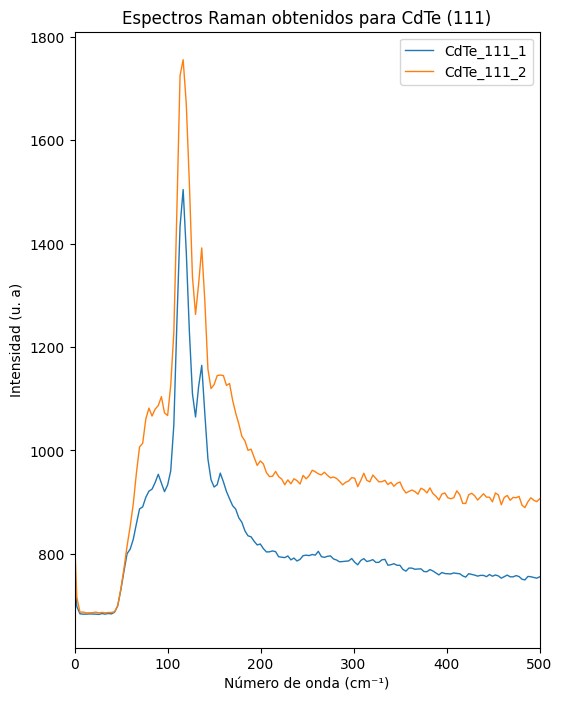

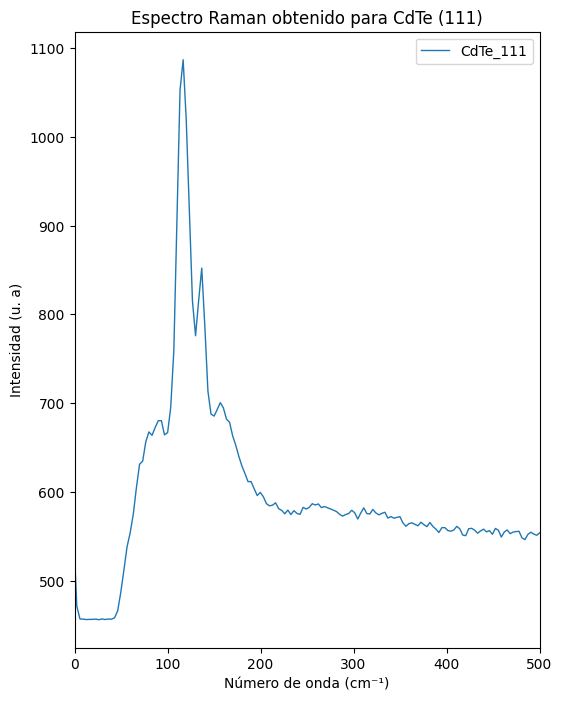

In [8]:
fig1 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para CdTe (111)")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(CdTe_111_1[::, 0], CdTe_111_1[::, 1], linewidth=1, label = CdTe_111[0])
plt.plot(CdTe_111_2[::, 0], CdTe_111_2[::, 1], linewidth=1, label = CdTe_111[1])
plt.legend()

fig2 = plt.figure(figsize = (6, 8))
plt.title("Espectro Raman obtenido para CdTe (111)")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(CdTe_111_1[::, 0], (CdTe_111_1[::, 1]+CdTe_111_2[::, 1])/3, linewidth=1, label = "CdTe_111")
plt.legend()

Plotting data from CdTe (100)

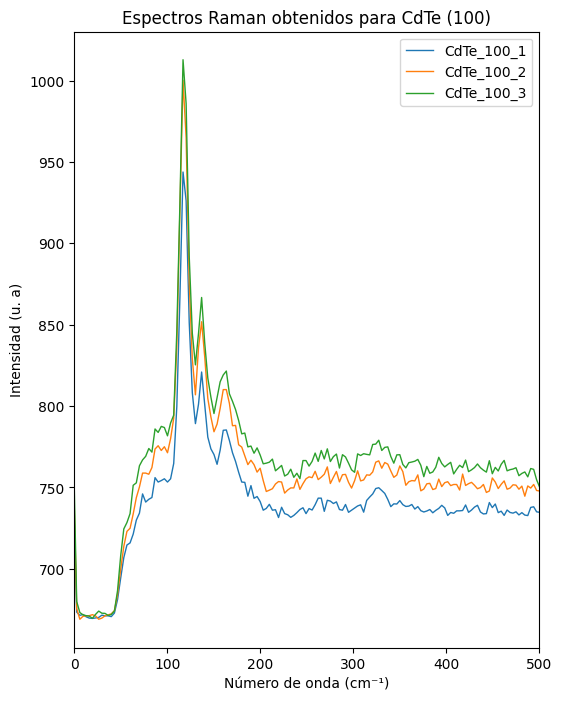

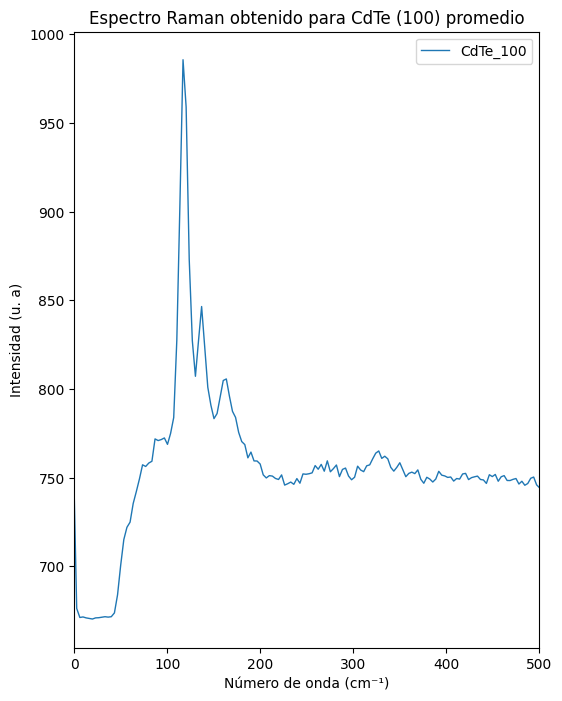

In [9]:
fig3 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para CdTe (100)")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(CdTe_100_1[::, 0], CdTe_100_1[::, 1], linewidth=1, label = CdTe_100[0])
plt.plot(CdTe_100_2[::, 0], CdTe_100_2[::, 1], linewidth=1, label = CdTe_100[1])
plt.plot(CdTe_100_3[::, 0], CdTe_100_3[::, 1], linewidth=1, label = CdTe_100[2])
plt.legend()

fig4 = plt.figure(figsize = (6, 8))
plt.title("Espectro Raman obtenido para CdTe (100) promedio")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(CdTe_100_1[::, 0], (CdTe_100_1[::, 1]+CdTe_100_2[::, 1]+CdTe_100_3[::, 1])/3, linewidth=1, label = "CdTe_100")
plt.legend()

Ploting datta from CdTe/Ag

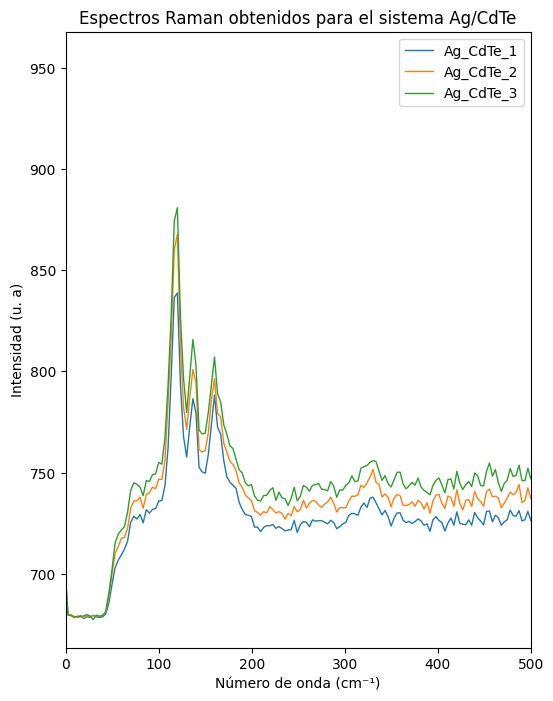

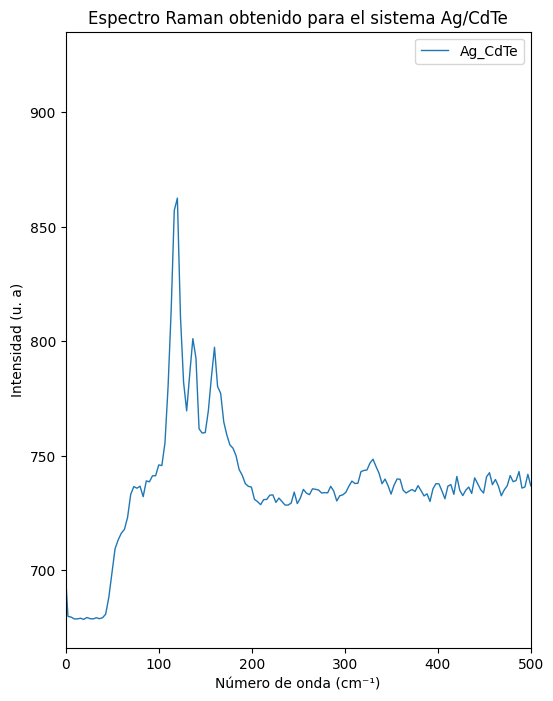

In [10]:
fig5 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para el sistema Ag/CdTe")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(Ag_CdTe_1[::, 0], Ag_CdTe_1[::, 1], linewidth=1, label = Ag_CdTe[0])
plt.plot(Ag_CdTe_2[::, 0], Ag_CdTe_2[::, 1], linewidth=1, label = Ag_CdTe[1])
plt.plot(Ag_CdTe_3[::, 0], Ag_CdTe_3[::, 1], linewidth=1, label = Ag_CdTe[2])
plt.legend()

fig6 = plt.figure(figsize = (6, 8))
plt.title("Espectro Raman obtenido para el sistema Ag/CdTe")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")

plt.xlim(0, 500)

plt.plot(Ag_CdTe_1[::, 0], (Ag_CdTe_1[::, 1]+Ag_CdTe_2[::, 1]+Ag_CdTe_3[::, 1])/3, linewidth=1, label = "Ag_CdTe")
plt.legend()

Comparision between CdTe(111) and Ag/CdTe

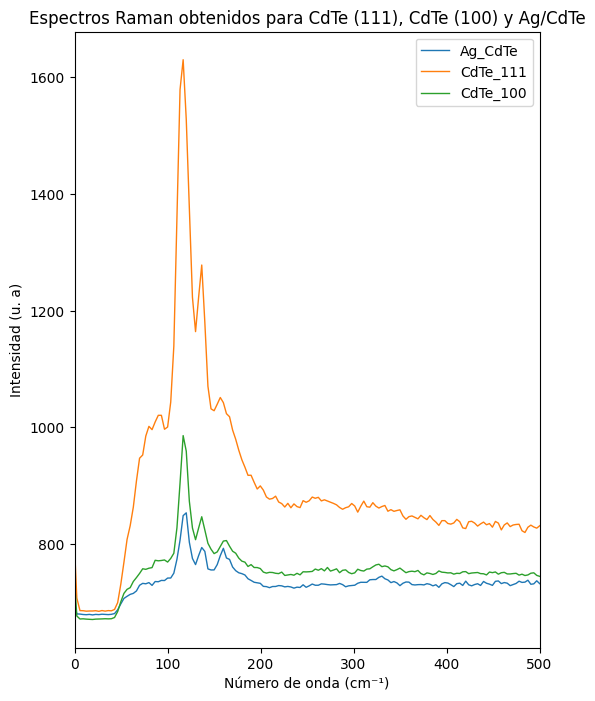

In [11]:
fig7 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para CdTe (111), CdTe (100) y Ag/CdTe")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(Ag_CdTe_1[::, 0], (Ag_CdTe_1[::, 1]+Ag_CdTe_2[::, 1])/2, linewidth=1, label = "Ag_CdTe")
plt.plot(CdTe_111_1[::, 0], (CdTe_111_1[::, 1]+CdTe_111_2[::, 1])/2, linewidth=1, label = "CdTe_111")
plt.plot(CdTe_100_1[::, 0], (CdTe_100_1[::, 1]+CdTe_100_2[::, 1]+CdTe_100_3[::, 1])/3, linewidth=1, label = "CdTe_100")
plt.legend()

Plotting data from HgCdTe

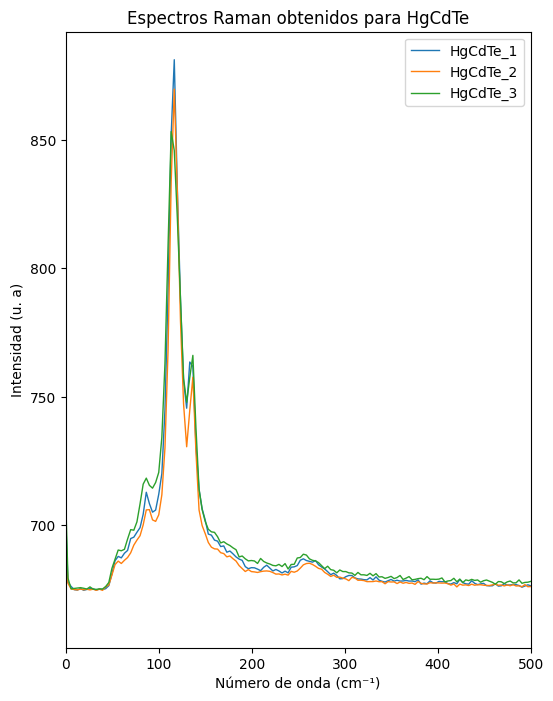

In [12]:
fig6 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(HgCdTe_1[::, 0], HgCdTe_1[::, 1], linewidth=1, label = HgCdTe[0])
plt.plot(HgCdTe_2[::, 0], HgCdTe_2[::, 1], linewidth=1, label = HgCdTe[1])
plt.plot(HgCdTe_3[::, 0], HgCdTe_3[::, 1], linewidth=1, label = HgCdTe[2])

plt.legend()

Plotting data from HgCdTe_s1

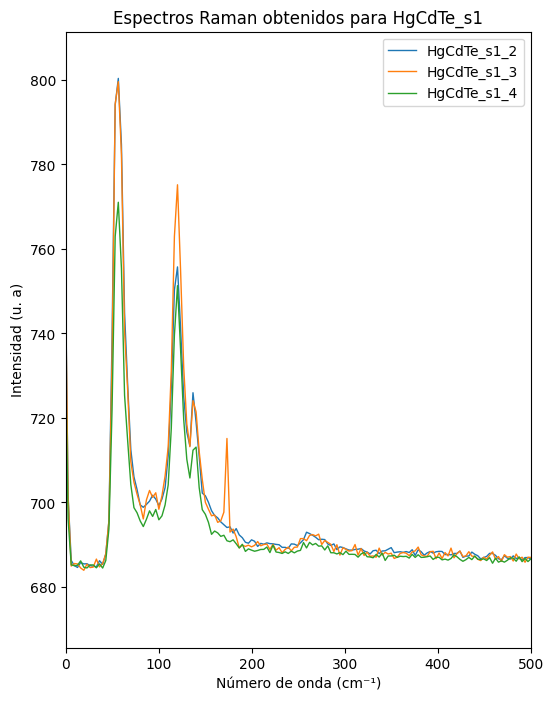

In [13]:
fig7 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe_s1")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

#plt.plot(HgCdTe_s1_1[::, 0], HgCdTe_s1_1[::, 1], linewidth=1, label = HgCdTe_s1[0])
plt.plot(HgCdTe_s1_2[::, 0], HgCdTe_s1_2[::, 1], linewidth=1, label = HgCdTe_s1[1])
plt.plot(HgCdTe_s1_3[::, 0], HgCdTe_s1_3[::, 1], linewidth=1, label = HgCdTe_s1[2])
plt.plot(HgCdTe_s1_4[::, 0], HgCdTe_s1_4[::, 1], linewidth=1, label = HgCdTe_s1[3])

plt.legend()

Plotting data from HgCdTe_s2

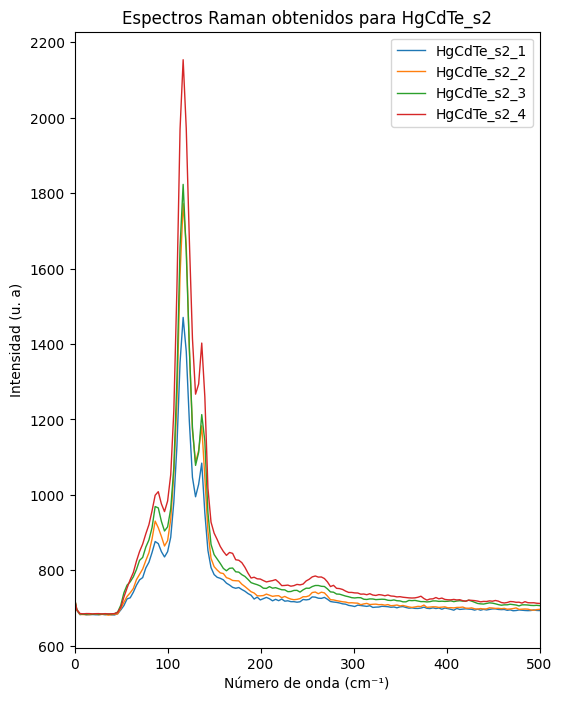

In [14]:
fig8 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe_s2")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(HgCdTe_s2_1[::, 0], HgCdTe_s2_1[::, 1], linewidth=1, label = HgCdTe_s2[0])
plt.plot(HgCdTe_s2_2[::, 0], HgCdTe_s2_2[::, 1], linewidth=1, label = HgCdTe_s2[1])
plt.plot(HgCdTe_s2_3[::, 0], HgCdTe_s2_3[::, 1], linewidth=1, label = HgCdTe_s2[2])
plt.plot(HgCdTe_s2_4[::, 0], HgCdTe_s2_4[::, 1], linewidth=1, label = HgCdTe_s2[3])

plt.legend()

Plotting data from HgCdTe_s3

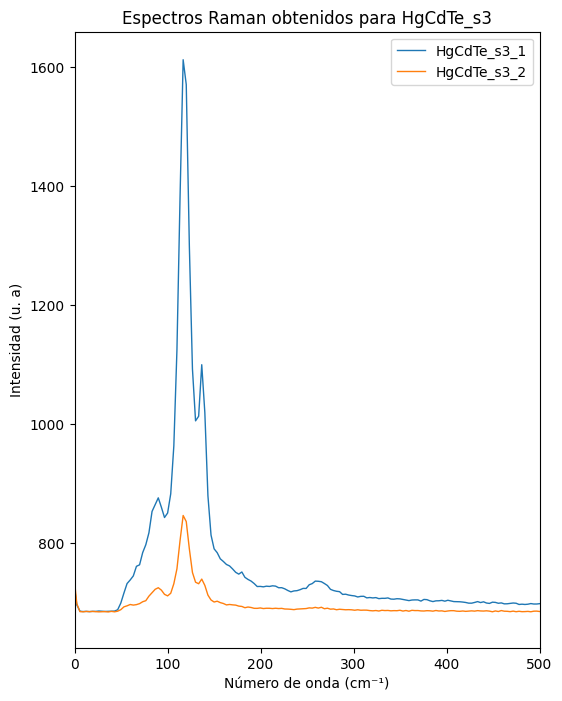

In [15]:
fig9 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe_s3")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(HgCdTe_s3_1[::, 0], HgCdTe_s3_1[::, 1], linewidth=1, label = HgCdTe_s3[0])
plt.plot(HgCdTe_s3_2[::, 0], HgCdTe_s3_2[::, 1], linewidth=1, label = HgCdTe_s3[1])

plt.legend()

Plotting data from HgCdTe_s4

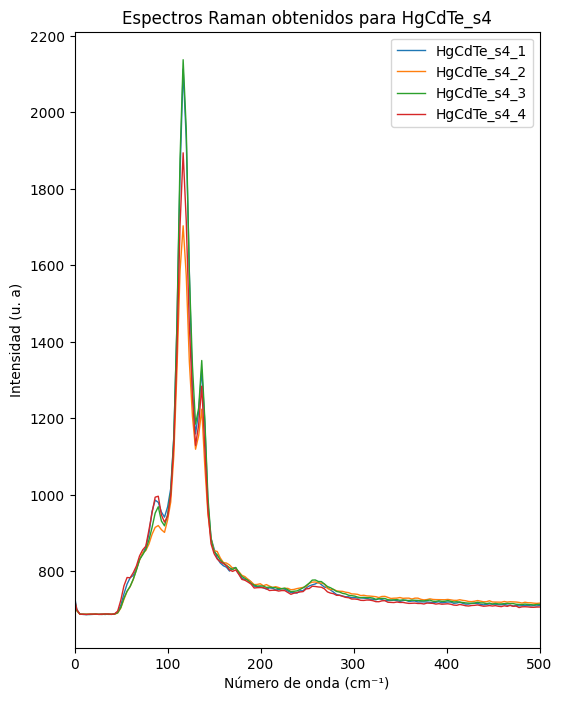

In [16]:
fig10 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe_s4")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(HgCdTe_s4_1[::, 0], HgCdTe_s4_1[::, 1], linewidth=1, label = HgCdTe_s4[0])
plt.plot(HgCdTe_s4_2[::, 0], HgCdTe_s4_2[::, 1], linewidth=1, label = HgCdTe_s4[1])
plt.plot(HgCdTe_s4_3[::, 0], HgCdTe_s4_3[::, 1], linewidth=1, label = HgCdTe_s4[2])
plt.plot(HgCdTe_s4_4[::, 0], HgCdTe_s4_4[::, 1], linewidth=1, label = HgCdTe_s4[3])

plt.legend()

Comprarision between HgCdTe s1, s2, s3 and s4

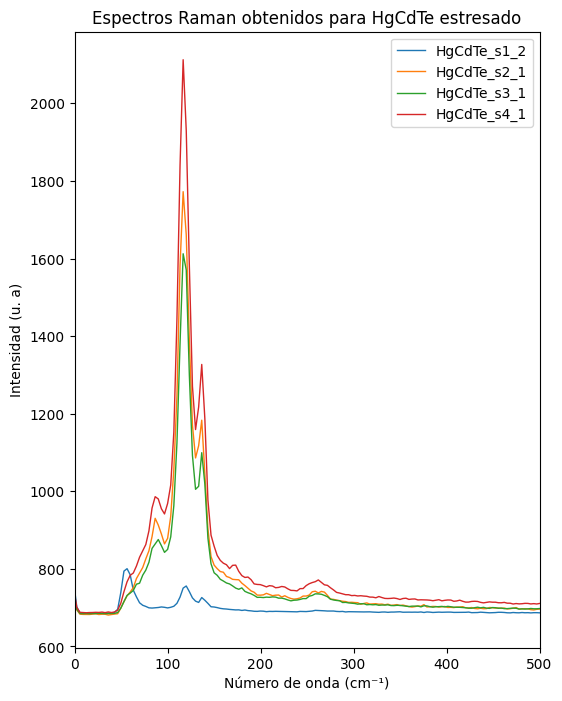

In [17]:
fig8 = plt.figure(figsize = (6, 8))
plt.title("Espectros Raman obtenidos para HgCdTe estresado")

plt.xlabel('Número de onda (cm⁻¹)')
plt.ylabel("Intensidad (u. a)")
plt.xlim(0, 500)

plt.plot(HgCdTe_s1_3[::, 0], HgCdTe_s1_2[::, 1], linewidth=1, label = HgCdTe_s1[1])
plt.plot(HgCdTe_s2_2[::, 0], HgCdTe_s2_2[::, 1], linewidth=1, label = HgCdTe_s2[0])
plt.plot(HgCdTe_s3_1[::, 0], HgCdTe_s3_1[::, 1], linewidth=1, label = HgCdTe_s3[0])
plt.plot(HgCdTe_s4_1[::, 0], HgCdTe_s4_1[::, 1], linewidth=1, label = HgCdTe_s4[0])

plt.legend()

<font size =6> Finding peaks from experimental data </font>

Peaks from CdTe (100) and Ag/CdTe

c:\Users\cutbe\AppData\Local\Programs\Python\Python311\Lib\site-packages\scipy\interpolate\_fitpack_impl.py:724: RuntimeWarning: The number of zeros exceeds mest
  warnings.warn(RuntimeWarning("The number of zeros exceeds mest"))


Raices de 1era D de CdTe (100) = [ 97.09419729 103.28145109 118.03112579 129.47074555 136.9985931
 150.11848147 159.94790091 223.07088158 262.08119183 289.29665752]
Raices de 1era D de Ag/CdTe = [ 91.46637593 101.24365001 118.48584804 128.71029993 136.38466887
 146.90540552 158.76445905 217.65566158 278.20099414 257.7216144 ]


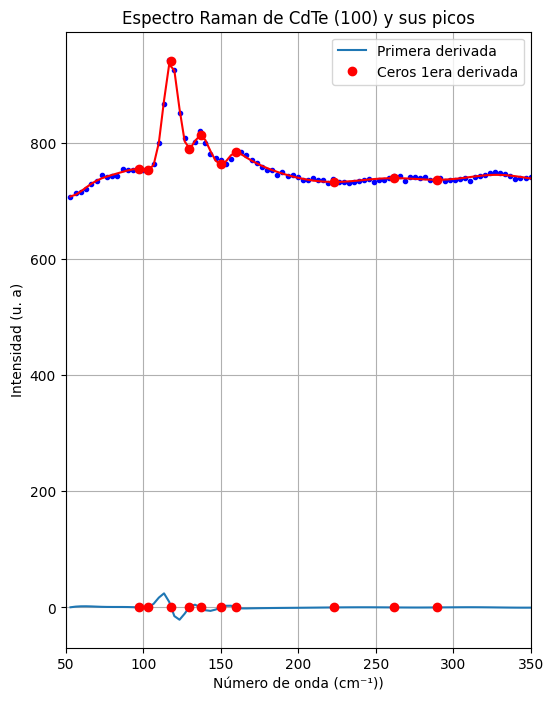

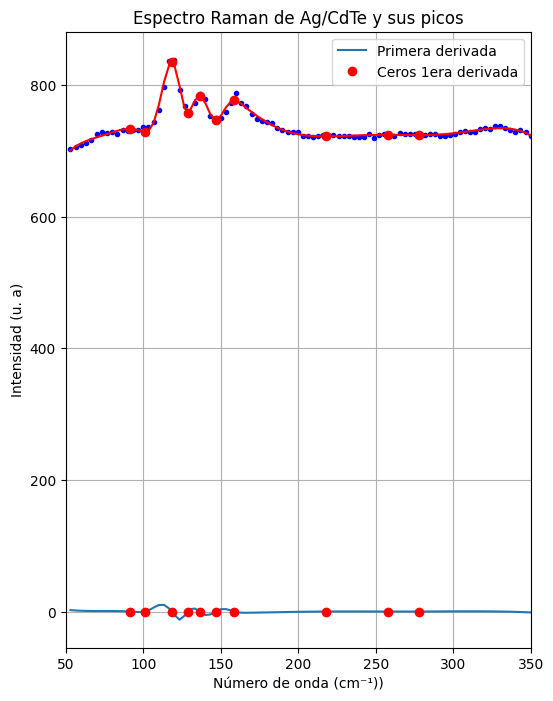

In [18]:
find_peaks(CdTe_100_1, 50, 350, 'CdTe (100)', 1000)
find_peaks(Ag_CdTe_1, 50, 350, 'Ag/CdTe', 1000)

Peaks from HgCdTe and HgCdTe s1

Raices de 1era D de HgCdTe = [ 92.71268545  97.62142467 116.42998674 128.66852919 134.55490694
 215.65405113 256.50393943 320.78793177 334.0353718 ]
Raices de 1era D de HgCdTe s1 = [ 43.47710431  88.89792541  98.03495092 117.23176919 131.26018012
 136.37214297 202.721221   214.09878858 235.16998738 259.56162157]


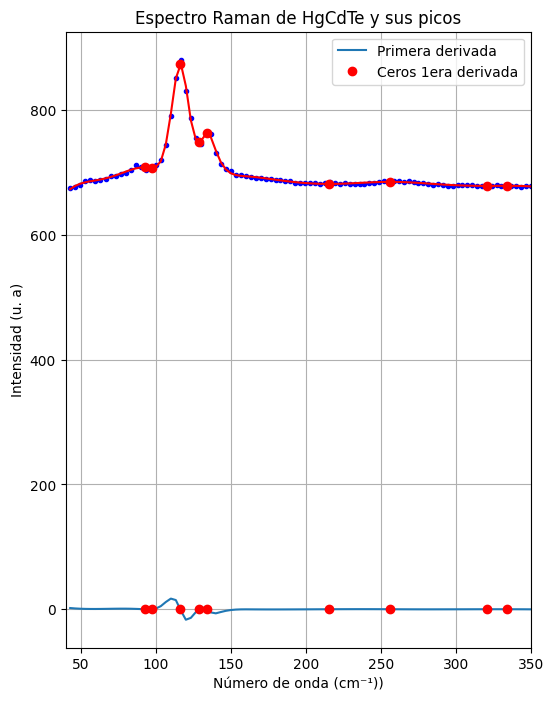

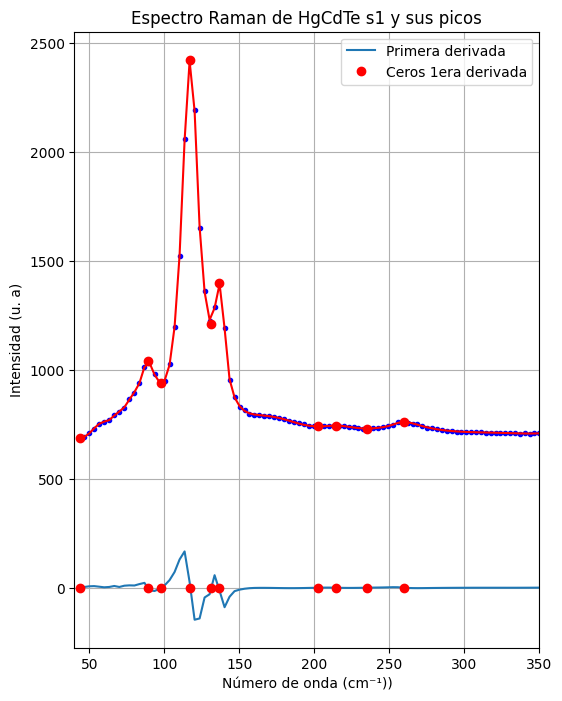

In [19]:
find_peaks(HgCdTe_1, 40, 350, 'HgCdTe', 400)
find_peaks(HgCdTe_s1_1, 40, 350, 'HgCdTe s1', 400)